# Snake - reproducibility (figures and captions)

To display image saved as pdf inside the Jupyter-Notebook we use [Wand](http://docs.wand-py.org/).
To install Wand:

    > pip install wand

In [1]:
import os

from IPython.core.display import display, Image
from wand.image import Image as WImage

## OpenFOAM (IcoFOAM)

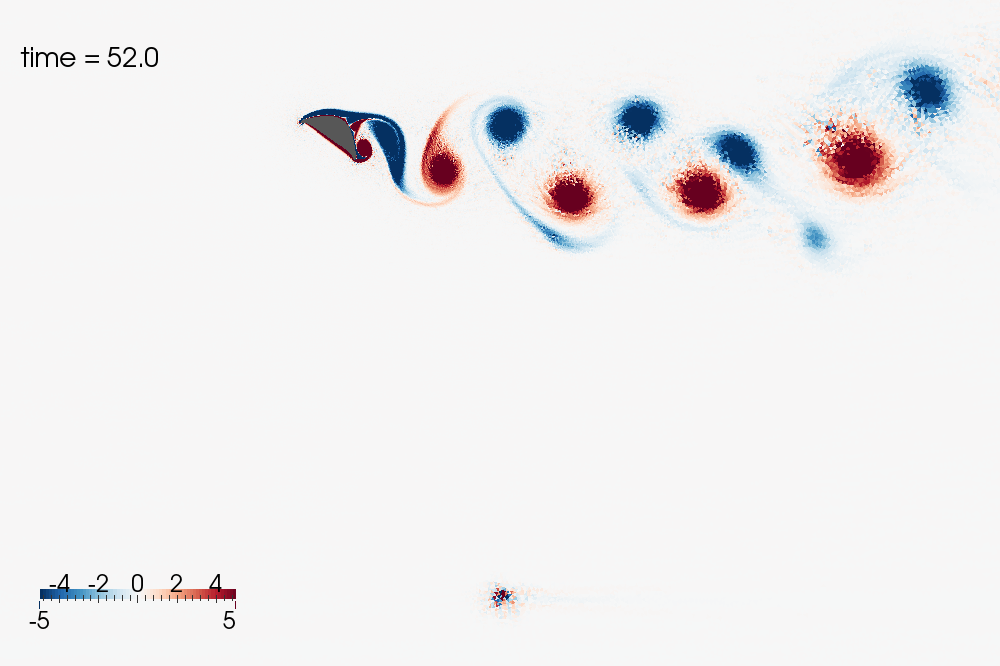

In [2]:
path = os.path.join('openfoam', 
                    'openfoam_vorticity52Re2000AoA35_gmshZeroGradient.pdf')
display(WImage(filename=path))

#### Figure

Filled contours of the vorticity field at non-dimensional time-unit 52.
The vortices shed by by the snake cross-section forms a Von Karman street.
The bluff body (of unit chord-length) is centered in the domain [-15, 15]x[-15, 15].
We created the computational mesh with GMSH; it contains about 700k triangles which are more refined as we move closer to the snake surface.
The minimum trianlge-edge is about 0.004, the finest cell-width used in Krishnan et al. (2014).
Although the mesh passes the OpenFOAM mesh-quality tests (utility `checkMesh`), we observed the degeneration of the solution at spots in the domain (visible on the bottom part of the figure above) with bad cell-shape.

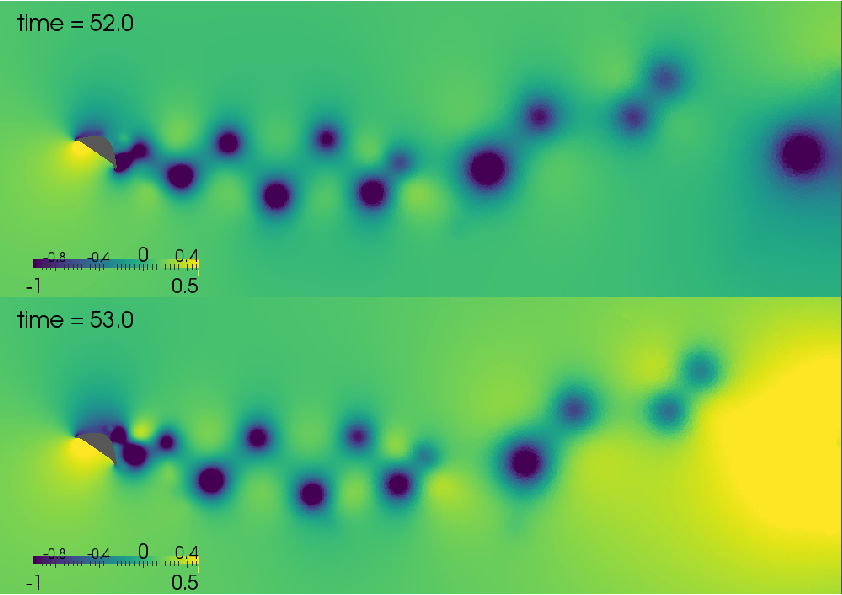

In [3]:
path = os.path.join('openfoam',
                    'openfoam_pressureRe2000AoA35_gmshZeroGradient.pdf')
display(WImage(filename=path))

#### Figure

Filled contours of the pressure field at time-unit 52 (top) and 53 (bottom) and Reynolds number 2000 when the snake's chord forms a 35 degrees angle with the freestream direction.
The right side of the figures coincides with the outlet boundary of the computational domain.
We used a zero-gradient condition for the pressure at the outlet.
After 52 time-unit a vortex (associated with negative pressure) is about the leave the ocmputational domain at the outlet.
At 53 time-units, we observe a localized over pressure at the outlet due to the convection of the vortex outside the domain.
For this configuration of the snake, the simulation blew up at the outlet after about 62.4 time-units.
No matter the snake configuration, we observed a localized over pressure at the oulet when the vortices are convected outside the domain.
However, some configurations allowed the simulation to run entirely up to 80 time-units.

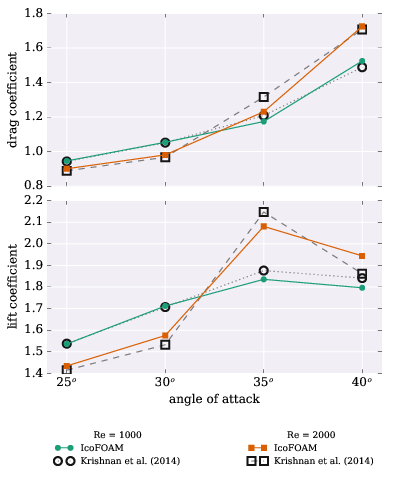

In [4]:
path = os.path.join('openfoam', 
                    'openfoam_forceCoefficientsVsAoA.pdf')
display(WImage(filename=path))

#### Figure

Time-averaged  drag coefficient (top) and lift coefficient (bottom) versus the angle-of-attack of the bluff-body for Reynolds numbers 1000 and 2000.
Empty squares and empty circles shows the results reported in Krishnan et al. (2014) for Reynolds numbers 1000 and 2000, respectively.
We averaged all force coefficients between 32 and 64 non-dimensional time-units.
Although we note some differences in the mean values at angles-of-attack 35 and 40 degrees, with IcoFOAM, we have been able to replicate one of the findings from Krishnan et al. (2014): we observe a lift-enhancement when the snake cross-section the lift enhancement at angle 35 degrees and Reynolds number 2000.

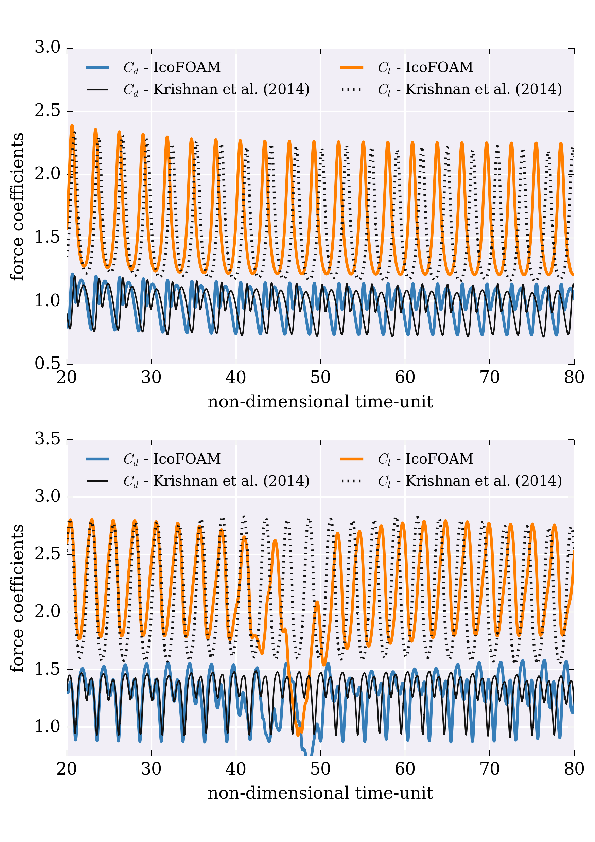

In [5]:
path = os.path.join('openfoam', 
                    'openfoam_forceCoefficientsRe2000.pdf')
display(WImage(filename=path))

#### Figure (top)

Instantatenous force coefficients of the snake at Reynolds number 2000 and angle-of-attack 30 degrees obtained with IcoFOAM.
The mesh, generated with SnappyHexMesh, contains about 3.4M cells (mostly hexahedra) and is refined in the vicinity of the snake to reach a minimum cell-width of 0.004.
We shows the results from Krishnan et al. (2014) for comparison.
While we observe a slight increasing phase difference between the signals, the time-averaged values remain close to those published in Krishnan et al. (2014).
When averaging the coefficients between 32 and 64 time-units, we get:
 cd=0.9810 (+1.4% relatively compared to Krishnan et al., 2014) and cl=1.5753 (+2.8%).
The time-averaged Strouhal number between 32 and 64 time-units is St=0.3445 (+2.0%).

#### Figure (bottom)

Instantatenous force coefficients of the snake at Reynolds number 2000 and angle-of-attack 35 degrees obtained with IcoFOAM.
The mesh, generated with SnappyHexMesh, contains about 3.4M cells (mostly hexahedra) and is refined in the vicinity of the snake to reach a minimum cell-width of 0.004.
We shows the results from Krishnan et al. (2014) for comparison.
When averaging the coefficients between 32 and 64 time-units, we get:
 cd=1.2306 (-6.5% relatively compared to Krishnan et al., 2014) and cl=2.0803 (-3.1%).
Although we are able to replicate one of the findings of Krishnan et al. (2014), a spike in the lift coefficient at angle-of-attack 35 degrees and Reynolds number 2000, we note severa discrepancies in the instantaneous signals.
We recall that Krishnan et al. (2014) reported that the forces acting on the cross-section reaches a steady periodic regime after 30 time-units.
We see that the minima obtained with IcoFOAM are higher than those from Krishnan et al. (2014) while the maxima matches.
Starting at about 35 time-units, we observe a drop in the mean lift coefficient.
After about 55 time-units, the lift coefficient reaches its highest value again.

## IBAMR

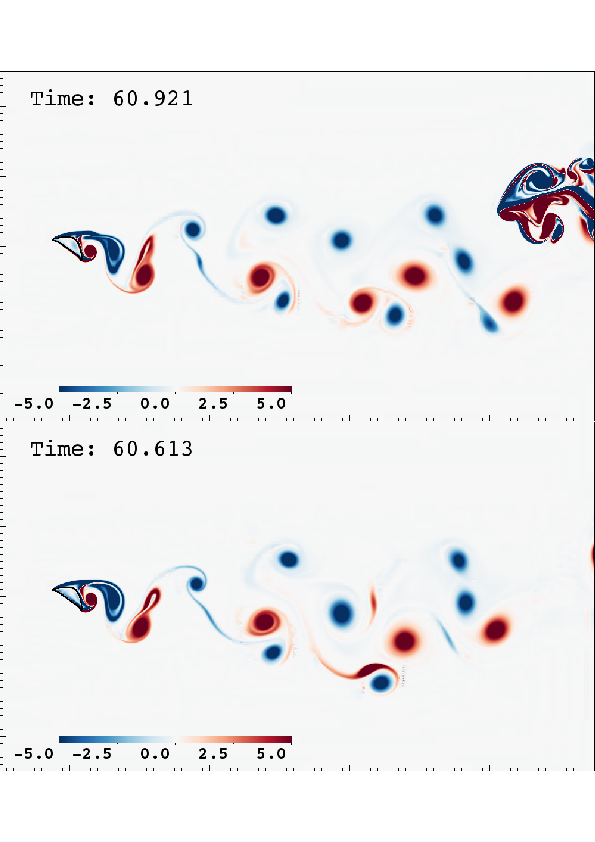

In [10]:
path = os.path.join('ibamr', 
                    'ibamr_vorticityRe2000AoA35.pdf')
display(WImage(filename=path))

#### Figure

Filled contours of the vorticity field after about 61 time-units of flow simulation for Reynolds number 2000 and angle-of-attack 35deg. We display the contours between -5 and +5.
We used a traction-free condition (top) for the velocity variable at the outlet boundary and observed some blockage effect: the vortices are not properly convected outside the computational domain and propagate back into it.
As a workaround, since no advective/convective boundary condition is available in the IBAMR library, we used a "stabilized outlet" boundary condition (bottom) that basically acts as force pushing the flow outside the domain.

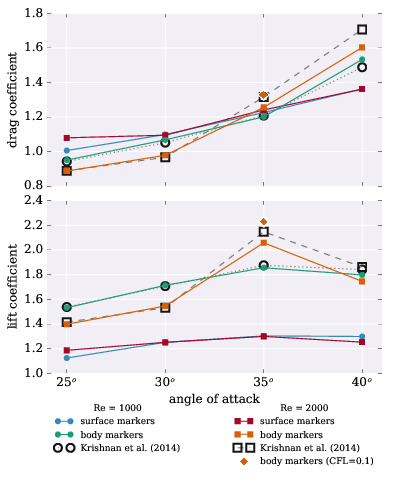

In [11]:
path = os.path.join('ibamr', 
                    'ibamr_forceCoefficientsVsAoA.pdf')
display(WImage(filename=path))

#### Figure

Time-averaged drag coefficients (top) and lift coefficients (bottom) of the snake cross-section at Reynolds numbers 1000 and 2000.
All instantaneous signals have been averaged between 32 and 64 time-units. Circular markers and squared markers shows the values for Reynolds numbers 1000 and 2000, respectively.
Empty symbols reports the values from Krishnan et al. (2014).
Blue and green symbols represents the averages obtained with IBAMR when the body surface is discretized, while red and orange symbolds shows the averages obtained with IBAMR when Lagrangian markers covers the entire snake cross-section.
We replicated the lift-enhancement mechanism at angle-of-attack 35 degrees and Reynolds number 2000 only when we enforce the no-slip condition everywhere inside the section (body markers).
In addition, we were able to get closer to the values reported in Kirshnan et al. (2014), when using smaller CFL constraint (0.1 insteado of 0.3 previously -- single orange diamond marker on the figure).

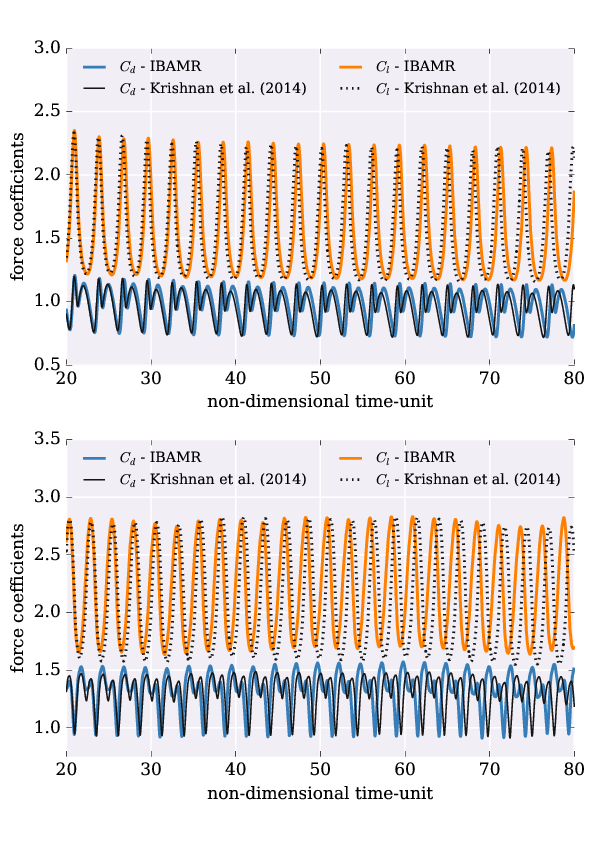

In [12]:
path = os.path.join('ibamr', 
                    'ibamr_forceCoefficientsRe2000.pdf')
display(WImage(filename=path))

#### Figure (top)

Instantaneous force coefficients up to 80 non-dimensional time-units at Reynolds number 2000 and angle-of-attack 35deg obtained with IBAMR. 
here, Lagrangian markers cover the entire cross-section of the snake.
We compare the results with those from Krishnan et al. (2014).
We observe a negligible increasing phase difference over the course of the simulation, but similar deviations and mean values than previous published results.
When averaging the signals between 32 and 64 time-units of flow simulation, we get: cd=0.9789 (+1.2%, relatively compared to Krishnan et al., 2014) and cl=1.5456 (+0.9%).
Using the same time-interval, we obtain a mean Strouhal number of 0.3367 (-0.3%).

#### Figure (bottom)

Instantaneous force coefficients up to 80 non-dimensional time-units at Reynolds number 2000 and angle-of-attack 35deg obtained with IBAMR. 
here, Lagrangian markers cover the entire cross-section of the snake.
We compare the results with those from Krishnan et al. (2014).
When averaging the signals between 32 and 64 time-units of flow simulation, we obtain a mean drag coefficient of 1.2558 (-4.6%, relatively compared to Krishnan et al., 2014) and a mean lift coefficient of 2.0580 (-4.1%).
Therefore, on average, we note a lift-enhancement at angle-of-attack 35 degrees and Reynolds number 2000, but observe some significant differences in the instantaneous forces.
Up to 20 time-units, the signals are in very good agreement with previous published results.
After, we observe an increasing phase difference in the forces history.
From 55 time-units to the end of the simulation, we see a drop in the instantaneous forces and the mean force coefficients never retrieve their highest value.

## PetIBM

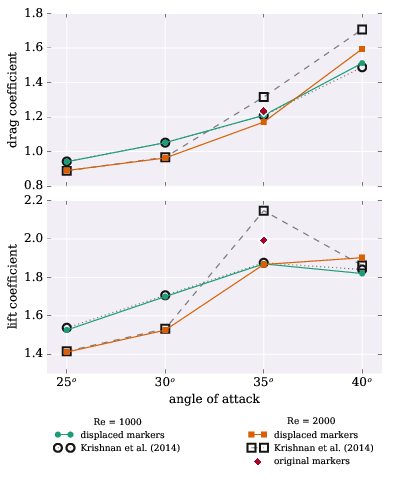

In [13]:
path = os.path.join('petibm', 
                    'petibm011_forceCoefficientsVsAoA.pdf')
display(WImage(filename=path))

#### Figure

Time-averaged drag coefficient (top) and lift coefficient (bottom) at Reynolds numbers 1000 (circles) and 2000 (squares) as a function of the angle-of-attack of the snake cross-section obtained with PetIBM.
Empty symbols represent the mean values from Krishnan et al. (2014).
The single red square shows the value obtained with a slightly displace immersed boundary.
We averaged the instantaneous force coefficients between 32 and 64 time-units.
With PetIBM, the peak, at angle 35 degrees and Reynolds number 2000, in the lift generated on the cross-section is less pronounced than previous results with cuIBM.
With PetIBM, at angle-of-attack 35 degrees and Reynolds number 2000, we obtain a mean lift coefficient of 1.8671 (-13.0% relatively compared to Krishnan et al., 2014) and do not observe a pronounced peak in the lift curve.
However, in the situation where we displaced all Lagrangian markers by the same small amount, the mean lift coefficient changes and we get a new value of 1.9936 (-7.1% relatively compared to Krishnan et al., 2014): the peak becomes more pronounced.
With these results, we show that the method and mesh used to simulate the flow over the cross-section is very sensitive to the location of the immersed-boundary within the domain.

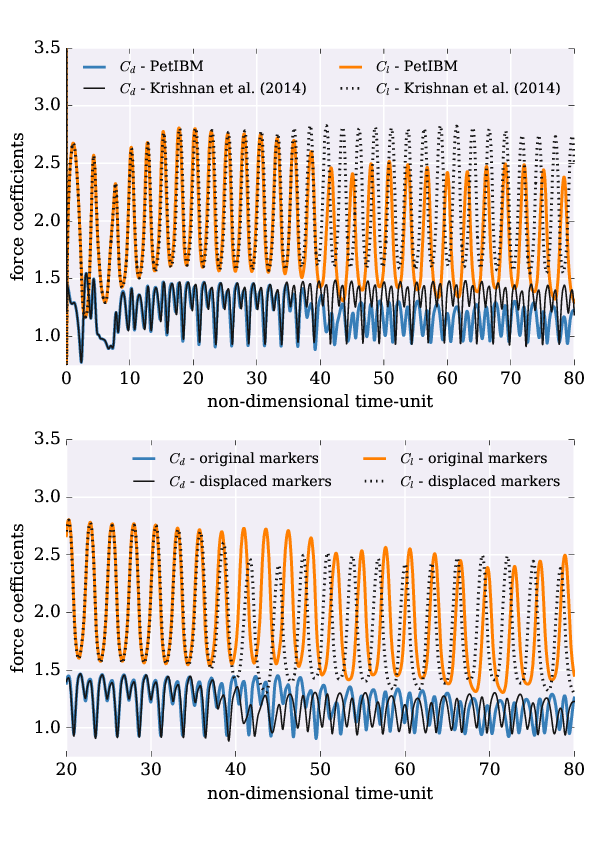

In [14]:
path = os.path.join('petibm', 
                    'petibm011_forceCoefficientsRe2000AoA35.pdf')
display(WImage(filename=path))

#### Figure (top)

Instantaneous force coefficients at Reynolds number 2000 and angle-of-attack 35 degrees obtained with PetIBM. 
We compared our results with signals from Krishnan et al. (2014).
The force coefficients are in very good agreement up to 35 time-units of flow simulation.
After that, we observe an irrevocable drop in the mean coefficients.

#### Figure (bottom)

Instantaneous force coefficients at Reynolds number 2000 and angle-of-attack 35 degrees.
We compare two PetIBM simulations (same version of the code) that have the same input parameters; the only difference is that in one of the simulations, the immersed boundary is slightly displaced (offset in both x- and y-directions).
Divergence in the signals appears after about 35 time-units.
Although both lift coefficients experience a drop in the mean value, it does not occur at the same moment.
It appears that the forces generated by the bluff-body greatly depends on its location within the computational domain.
When averaging the lift coefficient between 32 and 64 time-units, we do observe a slight lift-enhancement at 35 degrees and for Reynolds number 2000 when the body is in its original location.
When displacing the cross-section by a small amount and using the same interval for average, we do not observe anymore a peak in the lift curve and cannot confirm our previous findings.

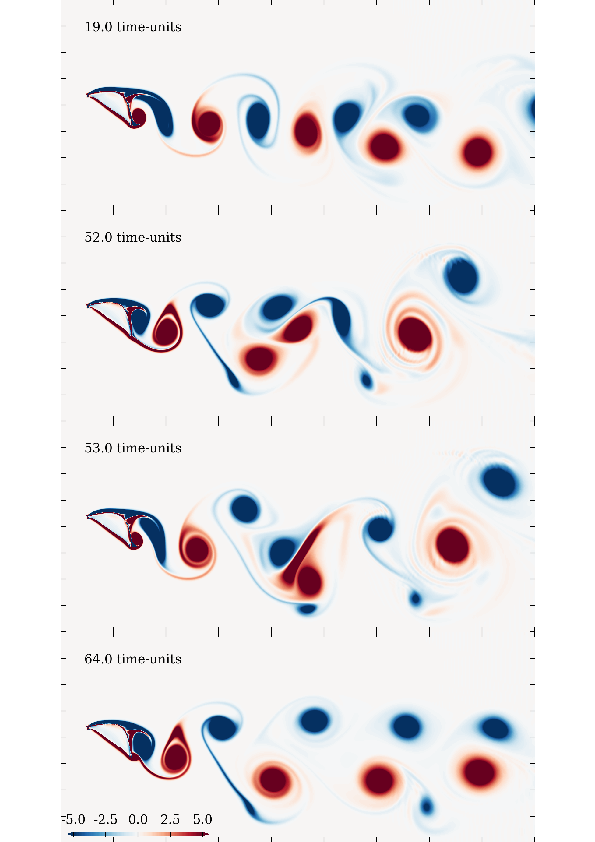

In [15]:
path = os.path.join('petibm', 
                    'petibm011_vorticityRe2000AoA35.pdf')
display(WImage(filename=path))

#### Figure

From top to bottom: filled contours of vorticity field after 19, 52, 53, and 64 time-units of flow simulation for a snake with angle-of-attack 35 degrees and a 2000 Reynolds number.
At 53 time-units, we note two counter-clockwise vortices (in red) merging together, destroying the previously aligned near wake vortices.
This vortex merging phenomenon alter permanently the wake signature afterwards: the vortices are not aligned anymore, the width of the wake becomes larger, and we obser a 1S+1P pattern (a single clockwise rotating vortex on the upper side of the wake and an unbalanced dipole on the bottom side).

## cuIBM

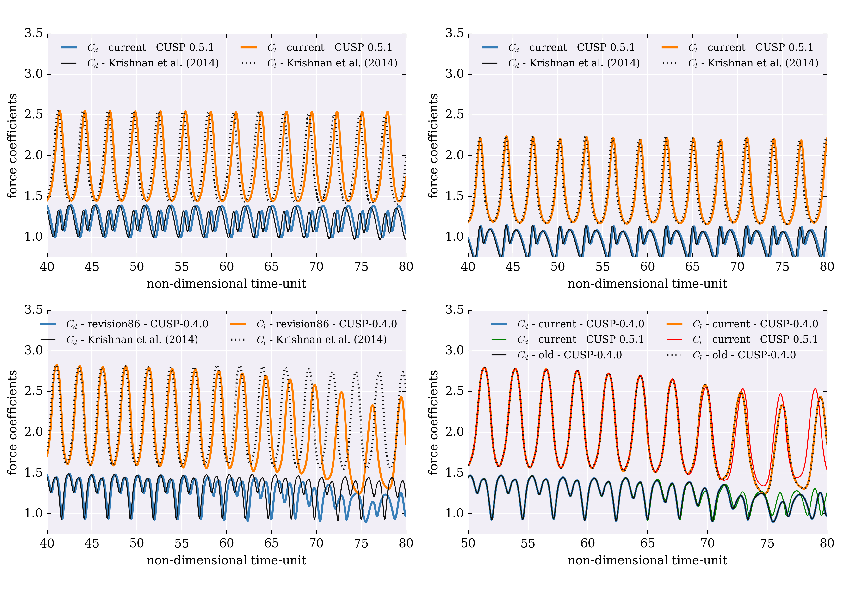

In [16]:
path = os.path.join('cuibm', 
                    'cuibm_forceCoefficients.pdf')
display(WImage(filename=path))

#### Figure (top-left)

Instantaneous force coefficients at angle 35 degrees and Reynolds number 1000 using a newer version of cuIBM and cusp-0.5.1.
Beside from a phase difference between the signals, we obtain good agreement in the time-averaged force coefficients with those from Krishnan et al. (2014).

#### Figure (top-right)

Instantaneous force coefficients of the bluff-body at angle-of-attack 30 degrees and Reynolds number 2000.
We used the current version of cuIBM and a newer version of the library CUSP (0.5.1).
The signals match previously published results (Krishnan et al., 2014).
The mean force coefficients and Strouhal number (averaged between 32 and 64 time-units) are almost identical to the values from our previous study ($<0.3\%$).

#### Figure (bottom-left)

Instantaneous force coefficients of a cross-section at angle-of-attack 35 degrees and Reynolds number 2000.
We used the same version of cuIBM than Krishnan et al. (2014) adapted to the library cusp-0.4.0 compatible with CUDA-7.5 to iteratively solve the linear systems on a single-GPU.
We observe a drop in the mean coefficients over the end of the run (between 60 and 80 time-units of flow simulation).
If we average the signals between 32 and 64 time-units, we obtain a mean drag coefficient of 1.3050 (-0.9% relatively compared to Krishnan et al., 2014) and a mean lift coefficient of 2.1190 (-1.3%).

#### Figure (bottom-right)

Instantaneous force coefficients of a cross-section at angle-of-attack 35 degrees and Reynolds number 2000.
We compare two versions of cuIBM: the version used in Krishnan et al. (2014) adapted to the library CUSP-0.4.0 (full and dotted black lines) and the current version with versions 0.4.0 (blue and orange lines) and 0.5.1 (green and red lines) of the CUSP library.
For all runs, we used CUDA-7.5 and a single GPU K20.
We observe a drop in the mean force coefficients over the end of the simulation that was not reported in Krishnan et al. (2014).
We obtain the same signals with CUSP-0.4.0 between the old and current versions of cuIBM.
However, we note some discrepancies when using an even newer version of CUSP (0.5.1).

If we average the force coefficients between 32 and 64 time-units of flow simulation, we obtain good agreement with our previous study:

| run | $C_d$ | $C_l$ |
|:-|:-:|:-:|
|Krishnan et al. (2014)| 1.3162 | 2.1471 |
| old cuIBM - CUSP-0.4.0 | 1.3050 (-0.9%) | 2.1190 (-1.3%) |
| current cuIBM - CUSP-0.4.0 | 1.3050 (-0.9%) | 2.1190 (-1.3%) |
| current cuIBM - CUSP-0.5.1 | 1.3049 (-0.9%) | 2.1203 (-1.2%) |